#### Importing Libraries

In [7]:
import pandas as pd
import os

#### Task #1: Merge the 12 months of sales data into a single CSV file

In [75]:
#Read CSV File
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv") 

files = [file for file in os.listdir('./Sales_Data')]  #List of all files in a Folder
All_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("./Sales_Data/" + file)
    All_months_data = pd.concat([All_months_data, df]) #Concatenate all the files into 1
    
All_months_data.to_csv("all_data.csv", index = False)
All_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Read in the updated data frame

In [19]:
all_data = pd.read_csv("All_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Clean Up Data

#### Drop rows of NAN

In [36]:
nan_df = all_data[all_data.isna().any(axis=1)] #All Null Value filelds
nan_df.head()
all_data = all_data.dropna(how = 'all') #Droping Rows
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


#### Find all 'Or' and delete it

In [41]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

#### Converting columns into respective data types

In [50]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

C:\Users\Dell\AppData\Local\Temp\ipykernel_22568\140318151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
C:\Users\Dell\AppData\Local\Temp\ipykernel_22568\140318151.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])


#### Augment Data with additional columns

#### Task 2: Add Month column

In [45]:
all_data['Month'] = all_data['Order Date'].str[0:2] #Extract from Order Date into Month
all_data['Month'] = all_data['Month'].astype('int32') #Converting into INT
all_data.head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_22568\1369745424.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Month'] = all_data['Order Date'].str[0:2]
C:\Users\Dell\AppData\Local\Temp\ipykernel_22568\1369745424.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Month'] = all_data['Month'].astype('int32')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Task 2: Add a City column

In [98]:
def get_city(address):            #Extracting city from the address
    return address.split(',')[1]

def get_state(address):           #Extracting State from the address
    return address.split(',')[2].split(' ')[1]


all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

#all_data['City'] = all_data['Purchase Address'].apply(lambda x:get_city(x) + ' (' + get_state(x) + ')')
#all_data.drop(columns = 'Pin Code', inplace = True) #Inplace helps 
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


#### Add a Sales column

In [51]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_22568\4089898328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Question 1: What was the best month for sales? How much was earned in that month?

In [56]:
results = all_data.groupby('Month').sum()
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


#### Ploting the analysis

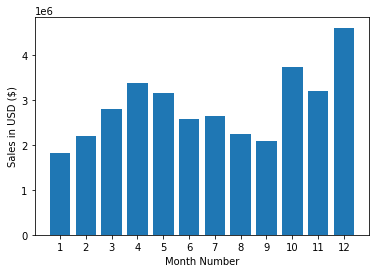

In [61]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.xlabel('Month Number')
plt.ylabel('Sales in USD ($)')
plt.show()

#### Question 2: What city had highest number of sales?

In [109]:
results = all_data.groupby('City').sum()
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


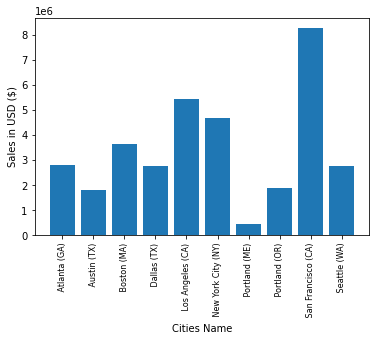

In [113]:
import matplotlib.pyplot as plt

cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation = 'vertical', size = 8)
plt.xlabel('Cities Name')
plt.ylabel('Sales in USD ($)')
plt.show()

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying produt?

In [114]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date']) #Converting Order Date(originally in string) to Date Time Format
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [123]:
all_data['Hour'] = all_data['Order Date'].dt.hour      #Extracting Hour from Time
all_data['Minutes'] = all_data['Order Date'].dt.minute  #Extracting Minutes from Time
#all_data.head()

In [135]:
results = all_data.groupby('Hour').sum()
results

,Quantity Ordered,Price Each,Month,Sales,Hours,Minutes
Hour,,,,,,
0,4428,709296.70,27554,713721.27,0,103596
1,2619,458490.00,16657,460866.88,2350,61807
2,1398,233833.64,8507,234851.44,2486,32508
3,928,144726.42,5904,145757.89,2493,23044
4,937,162058.18,6148,162661.01,3416,26876
5,1493,229621.21,9301,230679.82,6605,42877
6,2810,445000.11,17539,448113.00,14892,80343
7,4556,740568.11,28850,744854.12,28077,127447
8,7002,1185970.62,43626,1192348.97,50048,198135


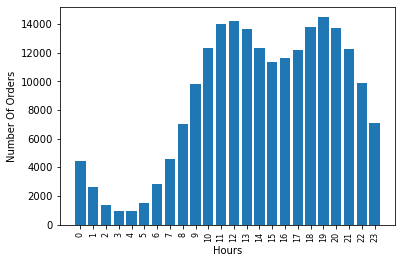

In [139]:
#Bar Chart

import matplotlib.pyplot as plt

results = all_data.groupby('Hour').sum()
Hour = [hour for hour, df in all_data.groupby('Hour')]

plt.bar(Hour, results['Quantity Ordered'])
plt.xticks(Hour, rotation = 'vertical', size = 8)
plt.xlabel('Hours')
plt.ylabel('Number Of Orders')
plt.show()

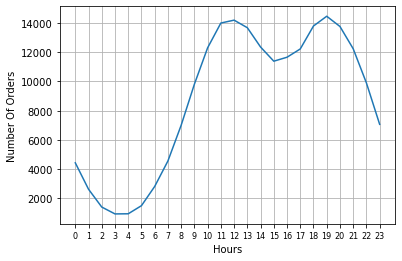

In [140]:
#Line Chart

hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, results['Quantity Ordered'])
plt.xticks(Hour, size = 8)
plt.xlabel('Hours')
plt.ylabel('Number Of Orders')
plt.grid()
#all_data.groupby(['Hour']).count()
plt.show()

#### Question 4: What products are more often sold together?

In [147]:
df = all_data[all_data['Order ID'].duplicated(keep = False)]  #Extract duplicate Order IDs rows

df['Grouped'] = all_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x)) #Group Product by Order ID
df = df[['Order ID','Grouped']].drop_duplicates()  #Remove the duplicate rows
df.head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_22568\3085367665.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = all_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x)) #Group Product by Order ID


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [154]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Question 5: What product sold the most? Why do you think it sold the most?

In [160]:
prod_grp = all_data.groupby('Product').count()
prod_grp.head()

,Order ID,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours,Minutes,Hour
Product,,,,,,,,,,,
20in Monitor,4101,4101,4101,4101,4101,4101,4101,4101,4101,4101,4101
27in 4K Gaming Monitor,6230,6230,6230,6230,6230,6230,6230,6230,6230,6230,6230
27in FHD Monitor,7507,7507,7507,7507,7507,7507,7507,7507,7507,7507,7507
34in Ultrawide Monitor,6181,6181,6181,6181,6181,6181,6181,6181,6181,6181,6181
AA Batteries (4-pack),20577,20577,20577,20577,20577,20577,20577,20577,20577,20577,20577


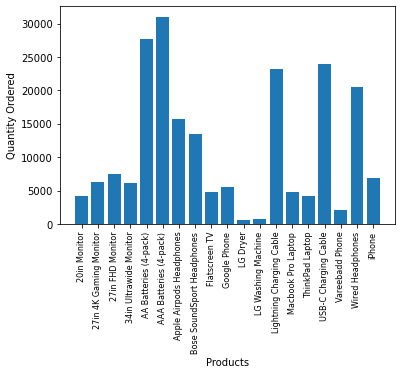

In [175]:
product_group = all_data.groupby('Product')
qty_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, qty_ordered)
plt.xticks(products, rotation = 'vertical', size = 8)
plt.xlabel('Products')
plt.ylabel('Quantity Ordered')
plt.show()

#### Overlaying the Quantity Ordered vs Prices of Products Graphs

C:\Users\Dell\AppData\Local\Temp\ipykernel_22568\3712969168.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  ax2.plot(products, prices, 'b-', color =  'b')
C:\Users\Dell\AppData\Local\Temp\ipykernel_22568\3712969168.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = 'vertical', size = 8)


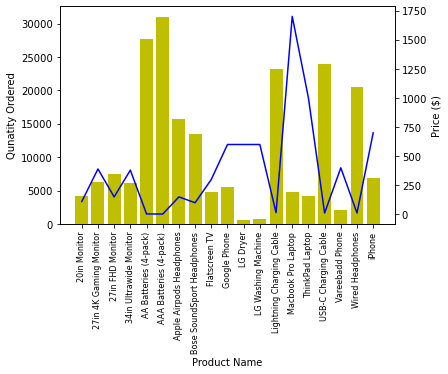

In [185]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, qty_ordered, color = 'y')
ax2.plot(products, prices, 'b-', color =  'b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Qunatity Ordered')
ax2.set_ylabel('Price ($)')
ax1.set_xticklabels(products, rotation = 'vertical', size = 8)

plt.show()